# CREATE DEEP NEURAL NETWORK

In [2]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Flatten, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import L2

from os.path import join
from os import listdir
from shutil import copy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# GLOBAL VARIABLES
preprocessingPath="preprocessingData"
path = "data"
classes = listdir(preprocessingPath)
trainPath = join(path,"train")
valPath = join(path,"val")
train = 0.80 # ;val = 1. - train
np.random.seed(26)


batch_size = 32
epochs = 256
lr = 1e-4
input_shape = (224,224)
channels = (1,)
class_mode = 'categorical'
color_mode = 'grayscale'
num_class = len(classes)

## Mount files to data generators

In [4]:
# ## SEPARATING TO TRAIN AND VALIDATION SETS
# for c in classes:
#     classPath = join(preprocessingPath,c)
#     images = listdir(classPath)
#     np.random.shuffle(images)
#     numImages = len(images)
#     setClassPath = join(trainPath,c)
#     for n,image in enumerate(images):
#         if n == round(numImages*train): 
#             setClassPath = join(valPath,c)
#         imagePath = join(classPath,image)
#         newImagePath = join(setClassPath,image)
#         copy(imagePath, newImagePath)

In [10]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #  width_shift_range = 0.2,
                                    #  height_shift_range = 0.2, 
                                    #  zoom_range = 0.2,
                                     shear_range = 0.5,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                    #  rotation_range = 45,
                                     ).flow_from_directory(directory = trainPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

val_generator = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory = valPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

Found 839 images belonging to 4 classes.
Found 210 images belonging to 4 classes.


## CREATE MODEL

In [20]:
model = Sequential()
model.add(Input(input_shape+channels))
model.add(Flatten())
model.add(Dense(units=512, kernel_regularizer=L2()))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=512, kernel_regularizer=L2()))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))



In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_9 (Dense)             (None, 512)               25690624  
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                      

In [22]:
model.compile(optimizer=Adam(lr), loss='mse', metrics=['acc'])

In [23]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=4, min_lr=1e-7)
es = EarlyStopping(monitor='loss', patience=7)

history = model.fit(train_generator, validation_data = val_generator, 
                        epochs = epochs, callbacks=[reduce_lr, es], 
                        verbose = 1)

Epoch 1/256
27/27 [==============================] - 3s 81ms/step - loss: 12.0766 - acc: 0.5515 - val_loss: 9.0907 - val_acc: 0.7500 - lr: 1.0000e-04
Epoch 2/256
27/27 [==============================] - 2s 74ms/step - loss: 7.3271 - acc: 0.5295 - val_loss: 5.8879 - val_acc: 0.7500 - lr: 1.0000e-04
Epoch 3/256
27/27 [==============================] - 2s 77ms/step - loss: 5.0397 - acc: 0.5593 - val_loss: 4.3233 - val_acc: 0.7500 - lr: 1.0000e-04
Epoch 4/256
27/27 [==============================] - 2s 76ms/step - loss: 3.8860 - acc: 0.5843 - val_loss: 3.5123 - val_acc: 0.7500 - lr: 1.0000e-04
Epoch 5/256
25/27 [==========================>...] - ETA: 0s - loss: 3.2779 - acc: 0.6319

KeyboardInterrupt: 

## PLOT RESULTS

In [15]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

best_epoch = np.argmax(np.array(val_acc))

print("Best Epoch: ", best_epoch)
print("Final Train Loss: {:.4f}".format(train_loss[best_epoch]))
print("Final Validation Loss: {:.4f}".format(val_loss[best_epoch]))
print("Final Train Accuracy: {:.4f}".format(train_acc[best_epoch]))
print("Final Test Accuracy: {:.4f}".format(val_acc[best_epoch]))

Best Epoch:  69
Final Train Loss: 5.1744
Final Validation Loss: 5.9718
Final Train Accuracy: 0.6532
Final Test Accuracy: 0.4286


In [16]:
import warnings
warnings.filterwarnings("ignore")

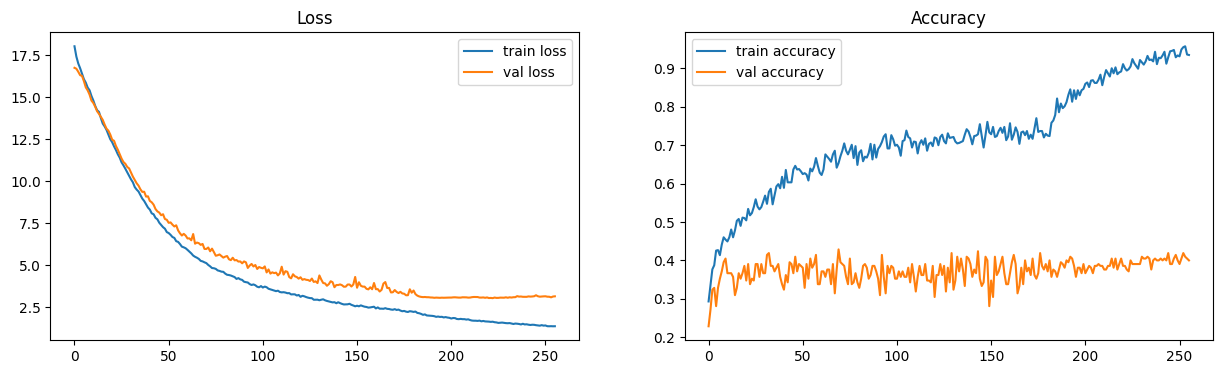

In [17]:

fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.lineplot(train_loss , ax=ax[0], label='train loss')
sns.lineplot(val_loss, ax=ax[0], label='val loss')
# ax[0].legend(labels=['train loss','validation loss'],loc="upper right")
ax[0].set_title('Loss')

sns.lineplot(train_acc, ax=ax[1], label='train accuracy')
sns.lineplot(val_acc, ax=ax[1], label='val accuracy')
# ax[1].legend(labels=['train acc','validation acc'],loc="upper right")
ax[1].set_title('Accuracy')

plt.show()
